The likelihood for the scattering angle $\theta$ of the detected particle by a neutrino-electron elastic scattering ($\nu e$ES) event is given by the differential cross section $\mathrm{d}\sigma/\mathrm{d}\cos(\theta)$

\begin{align}
    \mathcal{D}(\cos\theta, E_\nu) &= \frac{1}{N} \frac{\mathrm{d}\sigma}{\mathrm{d}\cos(\theta)} = \\
    & = \frac{1}{N} \sigma_0 \frac{4 E_\nu^2 (m_e + E_\nu)^2}{\left[ (m_e + E_\nu)^2 - E_\nu^2 \cos^2(\theta)\right]^2} \left[ g_1^2 + g_2^2 \left( 1 - \frac{2 m_e E_\nu \cos^2(\theta)}{(m_e + E_\nu)^2 - E_\nu^2 \cos^2(\theta)}\right)^2 - \right. \\
    & \left. - g_1 g_2 \frac{2 m_e^2 \cos^2(\theta)}{(m_e + E_\nu)^2 - E_\nu^2 \cos^2(\theta)} \right]
\end{align}

where $N$ is the normalization constant of the integration of the cross section over $\theta$, $\sigma_0 = 88.06 \times 10^{-46}$ cm$^2$. However, neutrinos also interact through other channels. The likelihood for $\cos(\theta)$ in this case given by a uniform distribution $\mathcal{U}(0, 1)$ since the electron/positron emission is isotropic. Thus, the final likelihood for $\cos(\theta)$ given a neutrino interaction is written as

\begin{align}
    F_\theta(\theta, E_\nu) = P_{\mathrm{ES}}(E_\nu) \mathcal{D}(\theta, E_\nu) + (1 - P_{\mathrm{ES}}(E_\nu)) F_u(\theta)
\end{align}

where $F_u(\theta) = \sin(\theta)/2$

---

\begin{align}
    & P_\phi(\phi) = \int \delta(\phi - \beta + \theta) F_\beta(\beta| E) F_\theta(\theta| E) P_E(E) \mathrm{d} \beta \mathrm{d} \theta \mathrm{d} E \\
    & P_\phi(\phi) = \int F_\beta(\beta| E) F_\theta(\beta - \phi| E) P_E(E) \mathrm{d} E \mathrm{d} \beta
\end{align}

---

where $P_{\mathrm{ES}}$ is the probability of the interaction ocurring via $\nu e$ES. This probability may be found by comparing the $\nu e$ES cross section with the total interaction cross section. Therefore,

$$ P_{\mathrm{ES}}(E_\nu) = \frac{\sigma_{\mathrm{ES}}(E_\nu)}{\sigma_T(E_\nu)} = \frac{\sigma_{\mathrm{ES}}(E_\nu)}{\displaystyle \sum_{i=1}^K \sigma_{i}(E_\nu)}$$

For $N$ neutrino detections, each one with a given energy $E$, the total likelihood is the product of all individual likelihood, since all detections are independent.

\begin{align}
    \mathcal{L}(\cos\theta, E_\nu) = \displaystyle \frac{1}{N} \prod_{i}^N L_i(\cos\theta, E_i)
\end{align}

There is still one last consideration. This the likelihood of a scattering angle, not a detection angle. The detection angle $\beta$ is the sum of the incident angle and the scattering angle $\beta = \phi + \theta$. Therefore, the detection likelihood must include the transformation $\cos(\theta) \rightarrow \cos(\theta + \phi)$. In order to determine $\phi$, we need to separe this cosine $\cos(\beta) = \cos(\theta)\cos(\phi) - \sin(\theta)\sin(\phi)$. We are now able to estimate $\phi$, by maximizing the likelihood of observing $\cos(\beta)$, knowing the likelihood for $\cos(\theta)$.

\begin{align}
    \mathcal{L}(\cos\beta, E_\nu, \phi) = \displaystyle \frac{1}{N} \prod_{i}^N L_i(\cos\beta, E_i, \phi)
\end{align}

such that

\begin{align}
    L(\cos\beta, E_i, \phi) = P_{\mathrm{ES}}(E_\nu) \left[\mathcal{D}(\cos\theta, E_\nu)\cos(\phi) - \mathcal{D}(\sin\theta, E_\nu)\sin(\phi) \right] + \left[ 1 - P_{\mathrm{ES}}(E_\nu) \right] \mathcal{U}(0, 1)
\end{align}

In [99]:
v = np.random.uniform(0, 1, 500)
thetas = np.arccos(2*v - 1)
# thetas = np.random.uniform(0, np.pi, 500)
phis = np.random.uniform(0, 2*np.pi, 500)

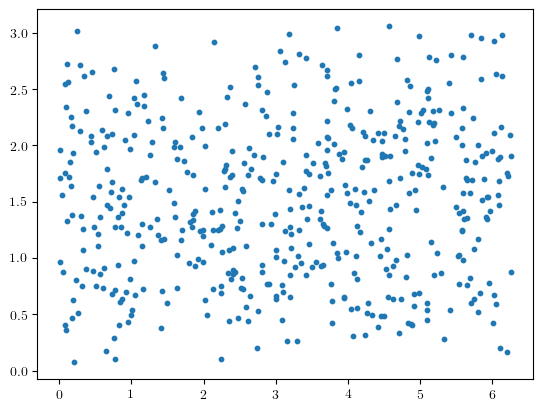

In [100]:
plt.scatter(phis, thetas, s = 10)
plt.show()

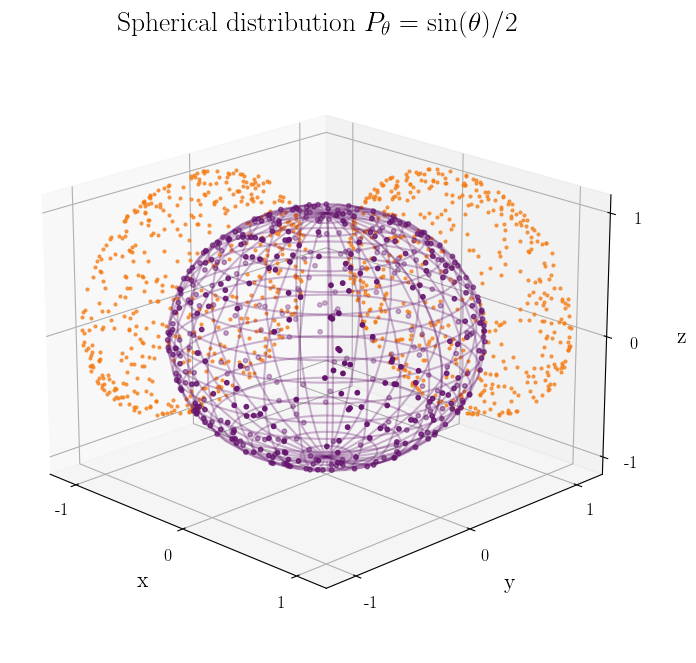

In [102]:
x = np.sin(thetas)*np.cos(phis)
y = np.sin(thetas)*np.sin(phis)
z = np.cos(thetas)

points = [x,y,z]

# draw sphere
u, v = np.mgrid[0:2*np.pi:60j, 0:np.pi:20j]
X = np.cos(u)*np.sin(v)
Y = np.sin(u)*np.sin(v)
Z = np.cos(v)

fig, ax = plt.subplots(subplot_kw=dict(projection='3d'), figsize=(8,8))
ax.scatter(*points, s = 10, color = sns.color_palette('inferno')[1])
ax.plot(x, z, color = sns.color_palette('inferno')[4], zdir='y', zs=1.2, alpha = 0.7, marker = 'o',
        markersize=2, lw = 0)
ax.plot(y, z, color = sns.color_palette('inferno')[4], zdir='x', zs=-1.2, alpha = 0.7, marker = 'o',
        markersize=2, lw = 0)
# alpha controls opacity
ax.plot_wireframe(X, Y, Z, color=sns.color_palette('inferno')[1], alpha=0.3)

ax.set_ylim(-1.2,1.2)
ax.set_xlim(-1.2,1.2)
ax.set_zlim(-1.1,1.1)
ax.set_xticks([-1,0,1])
ax.set_yticks([-1,0,1])
ax.set_zticks([-1,0,1])
ax.set_xticklabels([-1,0,1], fontsize = 12)
ax.set_yticklabels([-1,0,1], fontsize = 12)
ax.set_zticklabels([-1,0,1], fontsize = 12)
ax.set_xlabel('x', fontsize = 16, labelpad = 10)
ax.set_ylabel('y', fontsize = 16, labelpad = 10)
ax.set_zlabel('z', fontsize = 16, labelpad = 10)
ax.view_init(elev=20., azim=-45)

ax.set_title(r'Spherical distribution $P_\theta = \sin(\theta)/2$', fontsize = 20,
            pad = 0)

plt.savefig('Plots/Spherical_distribution_sin_theta.png', dpi = 300, bbox_inches = 'tight')
plt.savefig('Plots/Spherical_distribution_sin_theta.svg', dpi = 300, bbox_inches = 'tight')
plt.show()

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib as mpl
import pylab as pl
import scipy.stats as st
import seaborn as sns
import pandas as pd
import detection as dtc
import fitting
import emission
from constants import *
import cross_sections as cs
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
from math import gamma
from scipy.integrate import simps, simpson
from tqdm import tqdm
import os
from sklearn.metrics import r2_score
from random import choices
from astropy.coordinates import EarthLocation
from astropy.time import Time
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.io import ascii
import datetime
import spiceypy
import math


Bad key text.latex.preview in file /home/pedroc/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /home/pedroc/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file /home/pedroc/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, the default qualit

In [2]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [3]:
E = np.linspace(5, 100, 500) # Neutrino detection energy
detector = 'Hyper-k'
distance = 10 # kpc
if detector == 'super-k':
    targets = (32e9/18.01528)*6.022e23*2
elif detector == 'DUNE':
    targets = 6.03e32
elif detector == 'JUNO':
    targets = 1.5e33
elif detector == 'Hyper-k':
    targets = (216e9/18.01528)*6.022e23*2

In [6]:
galactic_center_RA = 266.42 # degrees
galactic_center_DEC = -29.00 # degrees J2000 epoch
date = '2023-8-15-23-11-00'

In [7]:
ref = dtc.energy_sampler(E, 'LS220-27.0', detector, 'normal', distance, get_directions = True,
                         perfect_resolution = True, date = '2023-5-10-11-46-00', declination = -29,
                         right_ascention = -266.42%180)


Number of expected neutrinos by flavor at 10 kpc (Hyper-k)

electron neutrinos ES: 989
electron antineutrinos ES: 303
mu/tau (anti)neutrinos ES: 618
electron neutrinos 16-O: 45632
electron antineutrinos 16-O: 0
electron antineutrinos IBD: 97337


In [8]:
ref.keys()

dict_keys(['Energy_ES_nu_e', 'Energy_ES_nubar_e', 'Energy_ES_nu_x', 'Energy_ES_Total', 'Energy_16O_nu_e', 'Energy_16O_nubar_e', 'Energy_IBD_nubar_e', 'Energy_Non-ES_Total', 'Energy_Total', 'Angle_theta_ES_nu_e', 'Angle_theta_ES_nubar_e', 'Angle_theta_ES_nu_x', 'Angle_theta_ES_Total', 'Angle_theta_16O_nu_e', 'Angle_theta_16O_nubar_e', 'Angle_theta_IBD_nubar_e', 'Angle_theta_Non-ES_Total', 'Angle_theta_Total', 'Nadir', 'Zenith'])

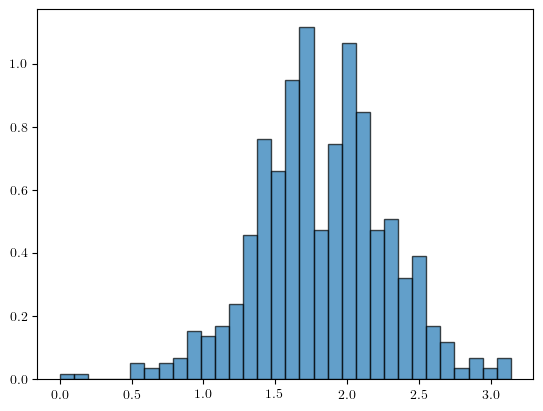

In [9]:
plt.hist(ref['Angle_theta_ES_nu_x'], bins = [i*np.pi/32 for i in range(33)], density = True,
        alpha = 0.7, edgecolor = 'black')
plt.show()

In [10]:
data = []
data_E = []
E_th = 15

for i in range(len(ref['Angle_theta_ES_Total'])):
    if ref['Energy_ES_Total'][i] <= E_th:
        data.append(ref['Angle_theta_ES_Total'][i])
        data_E.append(ref['Energy_ES_Total'][i])
        
for i in range(len(ref['Angle_theta_16O_nu_e'])):
    if ref['Energy_16O_nu_e'][i] <= E_th:
        data.append(ref['Angle_theta_16O_nu_e'][i])
        data_E.append(ref['Energy_16O_nu_e'][i])
        
for i in range(len(ref['Angle_theta_16O_nubar_e'])):
    if ref['Energy_16O_nubar_e'][i] <= E_th:
        data.append(ref['Angle_theta_16O_nubar_e'][i])
        data_E.append(ref['Energy_16O_nubar_e'][i])
        
for i in range(len(ref['Angle_theta_IBD_nubar_e'])):
    rand = np.random.uniform(0, 1)
    if rand >= 0.9:
        if ref['Energy_IBD_nubar_e'][i] <= E_th:
            data.append(ref['Angle_theta_IBD_nubar_e'][i])
            data_E.append(ref['Energy_IBD_nubar_e'][i])
        
data = np.array(data)
data_E = np.array(data_E)

In [11]:
len(data)

4977

In [12]:
data2 = []
data2_E = []

for i in range(len(ref['Angle_theta_ES_Total'])):
    data2.append(ref['Angle_theta_ES_Total'][i])
    data2_E.append(ref['Energy_ES_Total'][i])
        
for i in range(len(ref['Angle_theta_16O_nu_e'])):
    data2.append(ref['Angle_theta_16O_nu_e'][i])
    data2_E.append(ref['Energy_16O_nu_e'][i])
        
for i in range(len(ref['Angle_theta_16O_nubar_e'])):
    data2.append(ref['Angle_theta_16O_nubar_e'][i])
    data2_E.append(ref['Energy_16O_nubar_e'][i])
        
for i in range(len(ref['Angle_theta_IBD_nubar_e'])):
    rand = np.random.uniform(0, 1)
    if rand >= 0.9:
        data2.append(ref['Angle_theta_IBD_nubar_e'][i])
        data2_E.append(ref['Energy_IBD_nubar_e'][i])
        
data2 = np.array(data2)
data2_E = np.array(data2_E)

In [13]:
len(data2)

57173

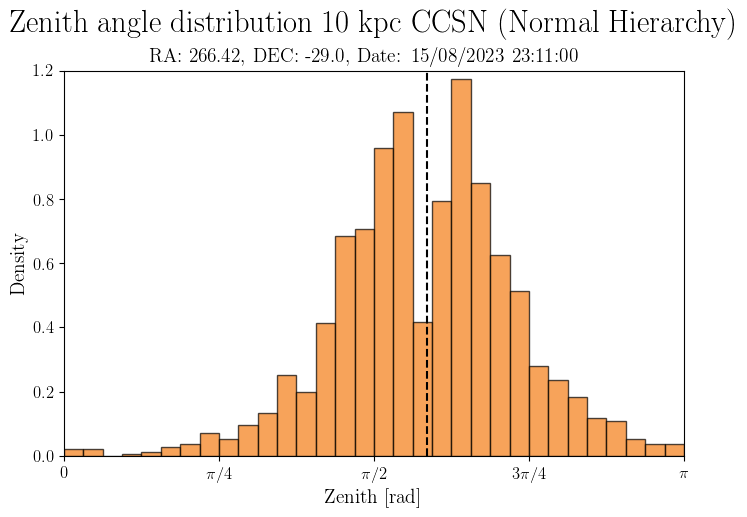

In [14]:
# plt.hist(ref['Angle_theta_ES_Total'], bins = [i*np.pi/16 for i in range(33)], density = True,
#         alpha = 0.7, edgecolor = 'black')
fig, ax = plt.subplots(figsize=(8,5))
# plt.hist(data, bins = [i*np.pi/32 for i in range(33)], density = True,
#         alpha = 0.7, edgecolor = 'black', facecolor = sns.color_palette('inferno')[3])
# plt.hist(ref['Angle_theta_Total'], bins = [i*np.pi/32 for i in range(33)], density = True,
#         alpha = 0.7, edgecolor = 'black', facecolor = sns.color_palette('inferno')[1])
plt.hist(ref['Angle_theta_ES_Total'], bins = [i*np.pi/32 for i in range(33)], density = True,
        alpha = 0.7, edgecolor = 'black', facecolor = sns.color_palette('inferno')[4])
plt.axvline(ref['Zenith'], ls = '--', color = 'black')
plt.xlabel('Zenith [rad]', fontsize = 14)
plt.xlim(0, np.pi)
plt.xticks([0,np.pi/4,np.pi/2,3*np.pi/4,np.pi], labels = ['0',r'$\pi/4$',r'$\pi/2$',r'$3\pi/4$',r'$\pi$'],
          fontsize = 12)
plt.ylabel('Density', fontsize = 14)
plt.ylim(0, 1.2)
plt.yticks(fontsize = 12)
plt.title('Zenith angle distribution 10 kpc CCSN (Normal Hierarchy)', fontsize = 22, pad = 28)
fig.text(0.5, 0.9, f'RA: {galactic_center_RA}, DEC: {galactic_center_DEC}, Date: 15/08/2023 23:11:00',
         fontsize = 14, ha = 'center')

fig.patch.set_alpha(0)
for ax in fig.axes:
    ax.patch.set_alpha(0)
# plt.savefig('Plots/Total_zenith_angles_slides_4.png', dpi = 600, bbox_inches = 'tight')
plt.show()

In [15]:
data[np.where(data > np.pi)[0]]

array([], dtype=float64)

In [16]:
def F_theta(theta, E, g1, g2):
    m_e = 0.511
    part1 = -4* E**2 * (m_e + E)**2 * np.cos(theta) * np.sin(theta) / ((E*(np.cos(theta) - 1) - m_e)**2 * (E*(np.cos(theta) + 1) + m_e)**2)
    T_e = 2*m_e*E**2 * np.cos(theta)**2 / ((m_e + E)**2 - E**2 * np.cos(theta)**2)
    part2 = g1**2 + g2**2 * (1 - T_e/E)**2 - g1*g2*m_e*T_e/E**2
    f = part1*part2
    return np.abs(f)

In [17]:
phi = ref['Zenith']
# cosines = np.cos(scattering)
# sines = np.linspace(np.min(np.sin(scattering)), np.max(np.sin(scattering)), 1000)
cosines = np.linspace(0, 1, 10000)
E = np.linspace(5, 100, 10000)
angles = []
# energies = []
E_samp = 10

for i in tqdm(range(len(ref['Angle_theta_ES_Total']))):
    # E_samp = choices(E, fitting.spectrum_shape(E, 1.7, 12), k = 1)[0]
    # energies.append(E_samp)
    Ncos = simps(cs.dsigma_dcostheta_ES(cosines, E_samp, g1_barnu_e, g2_barnu_e, sigma_0), cosines)
    cross_cos = cs.dsigma_dcostheta_ES(cosines, E_samp, g1_barnu_e, g2_barnu_e, sigma_0)/Ncos
    rand = np.random.uniform(0, 1)
    if rand >= 0.5:
        new_angle = (phi + np.arccos(choices(cosines, cross_cos, k = 1)[0]))
    else:
        new_angle = (phi - np.arccos(choices(cosines, cross_cos, k = 1)[0]))
        
    if new_angle > np.pi:
        new_angle = new_angle - np.pi
    if new_angle < 0:
        new_angle = np.pi + new_angle
    # angles.append(np.random.normal(new_angle, 26))
    angles.append(new_angle)
    
angles = np.array(angles)
# energies = np.array(energies)

100%|██████████| 1902/1902 [00:03<00:00, 595.07it/s]


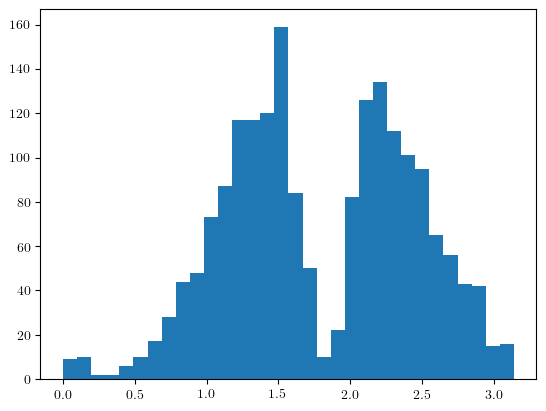

In [18]:
plt.hist(angles, bins = [i*np.pi/32 for i in range(33)])
plt.show()

In [19]:
channels = ['ibd','nue_e','nuebar_e','nue_O16','nuebar_O16','numu_e',
                    'numubar_e','nc_nue_O16']
xs_data = cs.snowglobes(channels)

# All these cross sections are in units of 10⁻³⁸ cm²/MeV
cs_ibd = interp1d(1e3*(10**(xs_data[0][0])), xs_data[0][4]/1e3, fill_value='extrapolate')
cs_nue_e = interp1d(1e3*(10**(xs_data[0][0])), xs_data[1][1]/1e3, fill_value='extrapolate')
cs_nuebar_e = interp1d(1e3*(10**(xs_data[0][0])), xs_data[2][4]/1e3, fill_value='extrapolate')
cs_nue_O16 = interp1d(1e3*(10**(xs_data[0][0])), xs_data[3][1]/1e3, fill_value='extrapolate')
cs_nuebar_O16 = interp1d(1e3*(10**(xs_data[0][0])), xs_data[4][1]/1e3, fill_value='extrapolate')
cs_nux_e = interp1d(1e3*(10**(xs_data[0][0])), xs_data[5][2]/1e3, fill_value='extrapolate')
cs_nuxbar_e = interp1d(1e3*(10**(xs_data[0][0])), xs_data[6][5]/1e3, fill_value='extrapolate')

In [20]:
def phi_prob(angles, E, g1, g2, only_ES = False):
    phi = np.linspace(0, np.pi, 1000)
    
    results = np.zeros(1000)
    for i in tqdm(range(1000)):
        ES_cross = cs_nue_e(E)*E + cs_nuebar_e(E)*E +cs_nux_e(E)*E + cs_nuxbar_e(E)*E
        Non_ES_cross = cs_nue_O16(E)*E + 0.1*cs_nuebar_O16(E)*E
        if only_ES:
            P_es = 1
        else:
            P_es = ES_cross/(ES_cross + Non_ES_cross)
        results[i] = np.sum(P_es*F_theta(angles-phi[i], E, g1_barnu_e, g2_barnu_e) + (1 - P_es)*np.sin(angles-phi[i])/2)
    return phi, results

In [21]:
phi, results = phi_prob(angles, 10, g1_barnu_e, g2_barnu_e,
                       only_ES = True)

100%|██████████| 1000/1000 [00:00<00:00, 1551.80it/s]


In [22]:
phi2, results2 = phi_prob(ref['Angle_theta_ES_Total'], ref['Energy_ES_Total'], g1_barnu_e, g2_barnu_e,
                         only_ES = True)

100%|██████████| 1000/1000 [00:01<00:00, 605.22it/s]


In [23]:
phi3, results3 = phi_prob(data, data_E, g1_barnu_e, g2_barnu_e, only_ES = False)

100%|██████████| 1000/1000 [00:03<00:00, 292.59it/s]


In [24]:
phi4, results4 = phi_prob(data2, data2_E, g1_barnu_e, g2_barnu_e, only_ES = False)

100%|██████████| 1000/1000 [00:41<00:00, 24.32it/s]


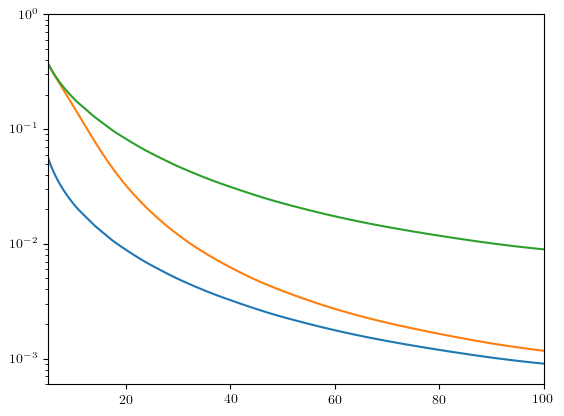

In [25]:
E_pes = np.linspace(5, 100, 1000)
ES_cross = cs_nue_e(E_pes)*E_pes + cs_nuebar_e(E_pes)*E_pes +cs_nux_e(E_pes)*E_pes + cs_nuxbar_e(E_pes)*E_pes
Non_ES_cross = cs_nue_O16(E_pes)*E_pes + cs_nuebar_O16(E_pes)*E_pes + cs_ibd(E_pes)*E_pes
Non_ES_cross_tag = cs_nue_O16(E_pes)*E_pes + cs_nuebar_O16(E_pes)*E_pes + 0.1*cs_ibd(E_pes)*E_pes
Non_ES_cross_ultratag = 0.1*cs_nue_O16(E_pes)*E_pes + 0.1*cs_nuebar_O16(E_pes)*E_pes + 0.1*cs_ibd(E_pes)*E_pes
P_es = ES_cross/(ES_cross + Non_ES_cross)
P_es_tag = ES_cross/(ES_cross + Non_ES_cross_tag)
P_es_ultratag = ES_cross/(ES_cross + Non_ES_cross_ultratag)

plt.plot(E_pes, P_es)
plt.plot(E_pes, P_es_tag)
plt.plot(E_pes, P_es_ultratag)
plt.yscale('log')
plt.ylim(6e-4, 1)
plt.xlim(5, 100)
plt.show()

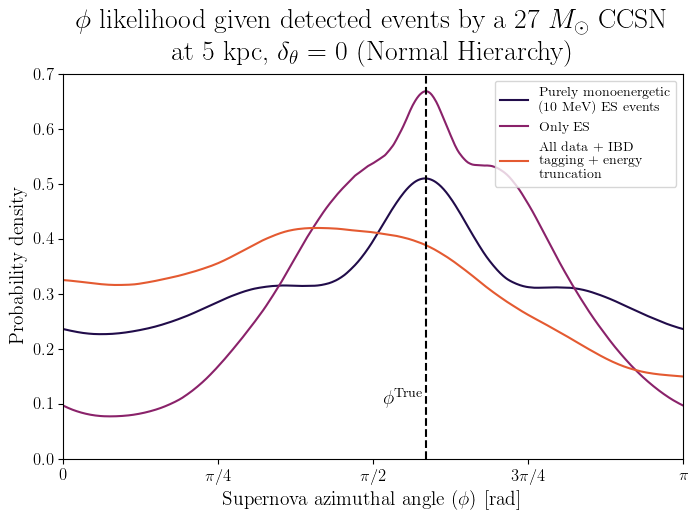

In [26]:
fig, ax = plt.subplots(figsize=(8,5))
plt.plot(phi, results/simps(results, phi), color = sns.color_palette('inferno', 7)[0],
        label = 'Purely monoenergetic \n (10 MeV) ES events')
# plt.fill_between(phi, 0, results/simps(results, phi), color = sns.color_palette('inferno')[2],
#                 alpha = 0.2)
plt.plot(phi2, results2/simps(results2, phi2), color = sns.color_palette('inferno', 7)[2],
        label = 'Only ES')
# plt.fill_between(phi2, 0, results2/simps(results2, phi2), color = sns.color_palette('inferno')[4],
#                 alpha = 0.2)
plt.plot(phi3, results3/simps(results3, phi3), color = sns.color_palette('inferno', 7)[4],
        label = 'All data + IBD \n tagging + energy \n truncation')
# plt.plot(phi4, results4/simps(results4, phi4), color = sns.color_palette('inferno', 7)[6],
#         label = 'All data + IBD \n tagging')
plt.axvline(ref['Zenith'], ls = '--', color = 'black')
plt.ylim(0,0.7)
plt.xlim(0, np.pi)
plt.xticks([0,np.pi/4,np.pi/2,3*np.pi/4,np.pi], labels = [r'0', r'$\pi/4$', r'$\pi/2$',
                                                          r'$3 \pi/4$', r'$\pi$'],
          fontsize = 12)
plt.xlabel(r'Supernova azimuthal angle ($\phi$) [rad]', fontsize = 14)
plt.yticks(fontsize = 12)
plt.ylabel(r'Probability density', fontsize = 14)

plt.text(np.pi/2 + 0.05, 0.1, r'$\phi^{\mathrm{True}}$', fontsize = 14)

plt.title(r'$\phi$ likelihood given detected events by a 27 $M_\odot$ CCSN'
          '\n'
          r'at 5 kpc, $\delta_\theta = 0$ (Normal Hierarchy)', fontsize = 20, pad = 10)
plt.legend(loc = 'upper right')
# plt.savefig('Plots/Likelihood_neutrino_angle_40kpc_LS220-27.0_IH_sin(angle-phi)_delta_neq_zero.png', dpi = 300, bbox_inches = 'tight')
# plt.savefig('Plots/Likelihood_neutrino_angle_40kpc_LS220-27.0_IH_sin(angle-phi)_delta_neq_zero.svg', dpi = 300, bbox_inches = 'tight')
plt.show()

In [127]:
# np.savetxt('Data/Phi_direction_reconstruct.txt', phi)
np.savetxt('Data/Likelihood_direction_reconstruct_monoenergetic_10MeV_IH_40kpc_LS220-27.0_sin(angle-phi)_delta_neq_zero.txt', results)
np.savetxt('Data/Likelihood_direction_reconstruct_only_ES_IH_40kpc_LS220-27.0_sin(angle-phi)_delta_neq_zero.txt', results2)
np.savetxt('Data/Likelihood_direction_reconstruct_all+IBD_tag+energy_cut_IH_40kpc_LS220-27.0_sin(angle-phi)_delta_neq_zero.txt', results3)
np.savetxt('Data/Likelihood_direction_reconstruct_all+IBD_tag_NH_I0kpc_LS220-27.0_sin(angle-phi)_delta_neq_zero.txt', results4)

In [27]:
mape = phi[np.where(-results2 == np.min(-results2))[0]]

In [28]:
mape

array([1.83652664])

In [29]:
ref['Zenith']

1.8404258417966086

In [30]:
peak_ci = 100*simps(results2[:np.where(-results2 == np.min(-results2))[0][0]], phi[:np.where(-results2 == np.min(-results2))[0][0]])/simps(results2, phi)

In [31]:
samples = choices(phi, results2/simps(results2, phi), k = 1000000)
len(np.where(samples <= mape)[0])/len(samples)
np.percentile(samples, peak_ci)

1.8333818989417912

In [32]:
def unit_vector(vector):
    """ Returns the unit vector of the vector.  """
    return vector / np.linalg.norm(vector)

def angle_between(v1, v2):
    """ Returns the angle in radians between vectors 'v1' and 'v2'::

            >>> angle_between((1, 0, 0), (0, 1, 0))
            1.5707963267948966
            >>> angle_between((1, 0, 0), (1, 0, 0))
            0.0
            >>> angle_between((1, 0, 0), (-1, 0, 0))
            3.141592653589793
    """
    v1_u = unit_vector(v1)
    v2_u = unit_vector(v2)
    return np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0))

In [33]:
z = R_earth*np.cos(np.pi/2 - detectors_lat[detector])
x = R_earth*np.sin(np.pi/2 - detectors_lat[detector])*np.cos(detectors_lon[detector])
y = R_earth*np.sin(np.pi/2 - detectors_lat[detector])*np.sin(detectors_lon[detector])

In [34]:
A = [x,y,z]

In [45]:
peak_ci

51.877855492120204

In [36]:
lats_1sigma = []
lons_1sigma = []
lats_2sigma = []
lons_2sigma = []
lats_3sigma = []
lons_3sigma = []
lats_mape = []
lons_mape = []
for lat in tqdm([-np.pi/2 + np.pi*i/60 for i in range(61)]):
    for lon in [-np.pi + np.pi*i/60 for i in range(121)]:
        z2 = R_earth*np.cos(np.pi/2 + lat)
        x2 = R_earth*np.sin(np.pi/2 + lat)*np.cos(lon)
        y2 = R_earth*np.sin(np.pi/2 + lat)*np.sin(lon)
        
        B = [x2,y2,z2]
        
        alpha = angle_between(A, B)
        
        if peak_ci < 34:
            if np.percentile(samples, 0) <= alpha <= np.percentile(samples, peak_ci+34) or np.percentile(samples, 100-(34 - peak_ci)) <= alpha <= np.percentile(samples, 100):
                lats_1sigma.append(lat)
                lons_1sigma.append(lon)
            if np.percentile(samples, 0) <= alpha <= np.percentile(samples, peak_ci+47.5) or np.percentile(samples, 100-(47.5 - peak_ci)) <= alpha <= np.percentile(samples, 100):
                lats_2sigma.append(lat)
                lons_2sigma.append(lon)
            if np.percentile(samples, 0) <= alpha <= np.percentile(samples, peak_ci+49.5) or np.percentile(samples, 100-(49.5 - peak_ci)) <= alpha <= np.percentile(samples, 100):
                lats_3sigma.append(lat)
                lons_3sigma.append(lon)
            if np.percentile(samples, peak_ci-5) <= alpha <= np.percentile(samples, peak_ci+5):
                lats_mape.append(lat)
                lons_mape.append(lon)
        elif 34 <= peak_ci < 47.5:
            if np.percentile(samples, peak_ci-34) <= alpha <= np.percentile(samples, peak_ci+34):
                lats_1sigma.append(lat)
                lons_1sigma.append(lon)
            if np.percentile(samples, 0) <= alpha <= np.percentile(samples, peak_ci+47.5) or np.percentile(samples, 100-(47.5 - peak_ci)) <= alpha <= np.percentile(samples, 100):
                lats_2sigma.append(lat)
                lons_2sigma.append(lon)
            if np.percentile(samples, 0) <= alpha <= np.percentile(samples, peak_ci+49.5) or np.percentile(samples, 100-(49.5 - peak_ci)) <= alpha <= np.percentile(samples, 100):
                lats_3sigma.append(lat)
                lons_3sigma.append(lon)
            if np.percentile(samples, peak_ci-5) <= alpha <= np.percentile(samples, peak_ci+5):
                lats_mape.append(lat)
                lons_mape.append(lon)
        elif 47.5 <= peak_ci < 49.5:
            if np.percentile(samples, peak_ci-34) <= alpha <= np.percentile(samples, peak_ci+34):
                lats_1sigma.append(lat)
                lons_1sigma.append(lon)
            if np.percentile(samples, peak_ci-47.5) <= alpha <= np.percentile(samples, peak_ci+47.5):
                lats_2sigma.append(lat)
                lons_2sigma.append(lon)
            if np.percentile(samples, 0) <= alpha <= np.percentile(samples, peak_ci+49.5) or np.percentile(samples, 100-(49.5 - peak_ci)) <= alpha <= np.percentile(samples, 100):
                lats_3sigma.append(lat)
                lons_3sigma.append(lon)
            if np.percentile(samples, peak_ci-5) <= alpha <= np.percentile(samples, peak_ci+5):
                lats_mape.append(lat)
                lons_mape.append(lon)
        elif 49.5 <= peak_ci < 50.5:
            if np.percentile(samples, peak_ci-34) <= alpha <= np.percentile(samples, peak_ci+34):
                lats_1sigma.append(lat)
                lons_1sigma.append(lon)
            if np.percentile(samples, peak_ci-47.5) <= alpha <= np.percentile(samples, peak_ci+47.5):
                lats_2sigma.append(lat)
                lons_2sigma.append(lon)
            if np.percentile(samples, peak_ci-49.5) <= alpha <= np.percentile(samples, peak_ci+49.5):
                lats_3sigma.append(lat)
                lons_3sigma.append(lon)
            if np.percentile(samples, peak_ci-5) <= alpha <= np.percentile(samples, peak_ci+5):
                lats_mape.append(lat)
                lons_mape.append(lon)
        elif 50.5 <= peak_ci < 52.5:
            if np.percentile(samples, peak_ci-34) <= alpha <= np.percentile(samples, peak_ci+34):
                lats_1sigma.append(lat)
                lons_1sigma.append(lon)
            if np.percentile(samples, peak_ci-47.5) <= alpha <= np.percentile(samples, peak_ci+47.5):
                lats_2sigma.append(lat)
                lons_2sigma.append(lon)
            if np.percentile(samples, peak_ci-49.5) <= alpha <= np.percentile(samples, 100) or np.percentile(samples, 0) <= alpha <= np.percentile(samples, (peak_ci+47.5) - 100):
                lats_3sigma.append(lat)
                lons_3sigma.append(lon)
            if np.percentile(samples, peak_ci-5) <= alpha <= np.percentile(samples, peak_ci+5):
                lats_mape.append(lat)
                lons_mape.append(lon)
        elif 52.5 <= peak_ci < 66:
            if np.percentile(samples, peak_ci-34) <= alpha <= np.percentile(samples, peak_ci+34):
                lats_1sigma.append(lat)
                lons_1sigma.append(lon)
            if np.percentile(samples, peak_ci-47.5) <= alpha <= np.percentile(samples, 100) or np.percentile(samples, 0) <= alpha <= np.percentile(samples, (peak_ci+47.5) - 100):
                lats_2sigma.append(lat)
                lons_2sigma.append(lon)
            if np.percentile(samples, peak_ci-49.5) <= alpha <= np.percentile(samples, 100) or np.percentile(samples, 0) <= alpha <= np.percentile(samples, (peak_ci+49.5) - 100):
                lats_3sigma.append(lat)
                lons_3sigma.append(lon)
            if np.percentile(samples, peak_ci-5) <= alpha <= np.percentile(samples, peak_ci+5):
                lats_mape.append(lat)
                lons_mape.append(lon)
        elif 66 <= peak_ci:
            if np.percentile(samples, peak_ci-34) <= alpha <= np.percentile(samples, 100) or np.percentile(samples, 0) <= alpha <= np.percentile(samples, (peak_ci+34) - 100):
                lats_1sigma.append(lat)
                lons_1sigma.append(lon)
            if np.percentile(samples, peak_ci-47.5) <= alpha <= np.percentile(samples, 100) or np.percentile(samples, 0) <= alpha <= np.percentile(samples, (peak_ci+47.5) - 100):
                lats_2sigma.append(lat)
                lons_2sigma.append(lon)
            if np.percentile(samples, peak_ci-49.5) <= alpha <= np.percentile(samples, 100) or np.percentile(samples, 0) <= alpha <= np.percentile(samples, (peak_ci+49.5) - 100):
                lats_3sigma.append(lat)
                lons_3sigma.append(lon)
            if np.percentile(samples, peak_ci-5) <= alpha <= np.percentile(samples, peak_ci+5):
                lats_mape.append(lat)
                lons_mape.append(lon)

 21%|██▏       | 13/61 [10:54<40:14, 50.31s/it]


ValueError: Percentiles must be in the range [0, 100]

In [37]:
lons_1sigma = np.array(lons_1sigma)
lats_1sigma = np.array(lats_1sigma)

lons_2sigma = np.array(lons_2sigma)
lats_2sigma = np.array(lats_2sigma)

lons_3sigma = np.array(lons_3sigma)
lats_3sigma = np.array(lats_3sigma)

lons_mape = np.array(lons_mape)
lats_mape = np.array(lats_mape)

In [38]:
spiceypy.furnsh('Data/kernel_meta.txt')

In [39]:
detec_time = datetime.datetime(int(date.split('-')[0]),int(date.split('-')[1]),int(date.split('-')[2]),
                                   int(date.split('-')[3]),int(date.split('-')[4]),int(date.split('-')[5])).strftime('%Y-%m-%dT%H:%M:%S')
DATETIME_ET = spiceypy.utc2et(detec_time)
observing_location = EarthLocation(lat=0*u.deg, lon=0*u.deg)
observing_time = Time(detec_time, scale='utc', location=observing_location)
GMST = observing_time.sidereal_time('mean')
GMST_deg = GMST.hour*15

dec_1sigma = -lats_1sigma
ra_1sigma = lons_1sigma + GMST_deg*np.pi/180

dec_2sigma = -lats_2sigma
ra_2sigma = lons_2sigma + GMST_deg*np.pi/180

dec_3sigma = -lats_3sigma
ra_3sigma = lons_3sigma + GMST_deg*np.pi/180

dec_mape = -lats_mape
ra_mape = lons_mape + GMST_deg*np.pi/180

In [40]:
coords = SkyCoord(ra=ra_1sigma, dec=dec_1sigma, unit='radian')
ra_1sigma = coords.ra.wrap_at(180 * u.deg).radian
dec_1sigma = coords.dec.radian

coords = SkyCoord(ra=ra_2sigma, dec=dec_2sigma, unit='radian')
ra_2sigma = coords.ra.wrap_at(180 * u.deg).radian
dec_2sigma = coords.dec.radian

coords = SkyCoord(ra=ra_3sigma, dec=dec_3sigma, unit='radian')
ra_3sigma = coords.ra.wrap_at(180 * u.deg).radian
dec_3sigma = coords.dec.radian

coords = SkyCoord(ra=ra_mape, dec=dec_mape, unit='radian')
ra_mape = coords.ra.wrap_at(180 * u.deg).radian
dec_mape = coords.dec.radian

In [41]:
values, bins_x, bins_y = np.histogram2d(ra_mape, dec_mape, bins = 33)

In [42]:
RA, DEC = np.meshgrid(bins_x, bins_y)

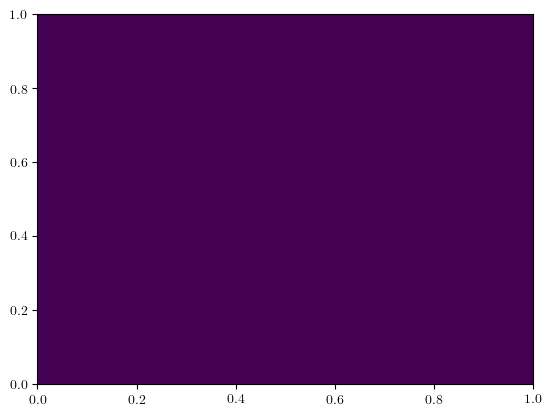

In [43]:
plt.pcolor(RA, DEC, values)
plt.show()

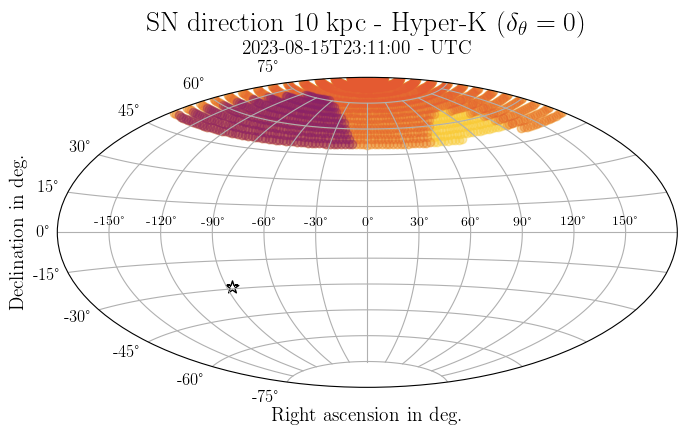

In [44]:
# We plot now the data in equatorial J2000. Again with a dark background and
# the same properties as before
# plt.style.use('dark_background')
fig = plt.figure(figsize=(8, 5))
plt.subplot(projection="aitoff")
plt.title(f'SN direction {distance} kpc - Hyper-K' r' ($\delta_\theta = 0$)', fontsize = 20, pad = 34)
fig.text(0.5, 0.85, f'{detec_time} - UTC', fontsize=14, ha = 'center')

color_map = plt.cm.Spectral_r
# fig.add_subplot(111, projection='aitoff')
plt.scatter(ra_3sigma, dec_3sigma, facecolor = sns.color_palette('inferno', 7)[6], alpha = 0.4)
plt.scatter(ra_2sigma, dec_2sigma, facecolor = sns.color_palette('inferno', 7)[4], alpha = 0.2)
plt.scatter(ra_1sigma, dec_1sigma, facecolor = sns.color_palette('inferno', 7)[2], alpha = 0.3)
plt.scatter(ra_mape, dec_mape, facecolor = sns.color_palette('inferno', 7)[0], alpha = 0.3)
# plt.pcolor(RA, DEC, values, cmap = 'Blues', vmin=0, vmax=1, alpha = 0.4)
plt.scatter(-(galactic_center_RA%180)*np.pi/180, galactic_center_DEC*np.pi/180, marker = '*', s = 90,
            facecolor = 'white', edgecolor = 'black')

# Convert the longitude values finally in right ascension hours
# plt.xticks(ticks=np.radians([-150, -120, -90, -60, -30, 0, \
#                              30, 60, 90, 120, 150]),
#            labels=['10h', '8h', '6h', '4h', '2h', '0h', \
#                    '22h', '20h', '18h', '16h', '14h'], fontsize = 12)
plt.yticks(fontsize = 12)

# Plot the labels
plt.xlabel('Right ascension in deg.', fontsize = 14, labelpad = 14)
plt.ylabel('Declination in deg.', fontsize = 14)

# Create a legend and grid
# plt.legend(bbox_to_anchor = (1.1,1.1), ncol = 2)
plt.grid(True)

# Save the figure
# plt.savefig(f'Plots/neutrino_direction_skymap_only_ES_{distance}kpc_delta_theta=0.svg',
#             dpi=300, bbox_inches = 'tight')
plt.show()